In [2]:
%load_ext autoreload
%autoreload 2

from NDDL2023 import PC_layer, Network, MultimodalNetwork

# Load Multi-model data

fashion MNIST dataset 

10 ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


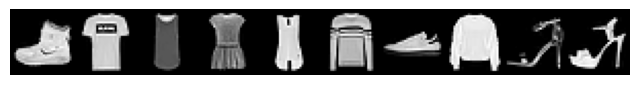

In [3]:
# Load MNIST FASHION dataset
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

# define the transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# download and create the training set
trainset = datasets.FashionMNIST(root='./data', download=True, train=True, transform=transform)

# create the training loader
trainloader = DataLoader(trainset, batch_size=8, shuffle=True)

all_labels = trainset.classes
print(len(all_labels), all_labels)

# plot images with labels
plt.figure(figsize=(8,8))
plt.imshow(make_grid(trainset.data[0:10].unsqueeze(1), nrow=10).permute(1,2,0))
plt.axis('off')
plt.show()

torch.Size([1, 28, 28])


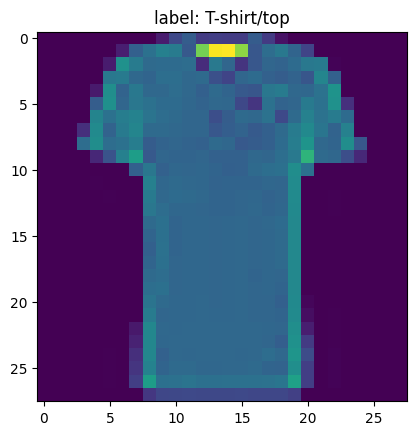

In [3]:
# get an image and plot it
dataiter = iter(trainloader)
images, labels = next(dataiter)

image_shape = images[0].shape
print(image_shape)
# plot an image
plt.imshow(np.transpose(images[0], (1, 2, 0)))
plt.title('label: {}'.format(all_labels[labels[0]]))
plt.show()

In [41]:
trainset.data.shape

# reshape to num_samples x (height x width)

images = trainset.data.reshape(trainset.data.shape[0], -1)
images.shape

# labels = trainset.targets.astype('int64')

torch.Size([60000, 784])

### Get embeddings vector per label

In [65]:
# from sentence_transformers import SentenceTransformer

# model_BERT = SentenceTransformer('all-MiniLM-L6-v2')

# def get_embeddings(model, all_labels, clip=False):

#     embedding_per_class = {}

#     for label in (all_labels):

#         #Our sentences we like to encode
#         sentences = [label]

#         #Sentences are encoded by calling model.encode()
#         embedding = model.encode(sentences)[0]

#         if clip:
#             embedding = embedding[0:380]

#         embedding_per_class[str(label)] = embedding

#     return embedding_per_class


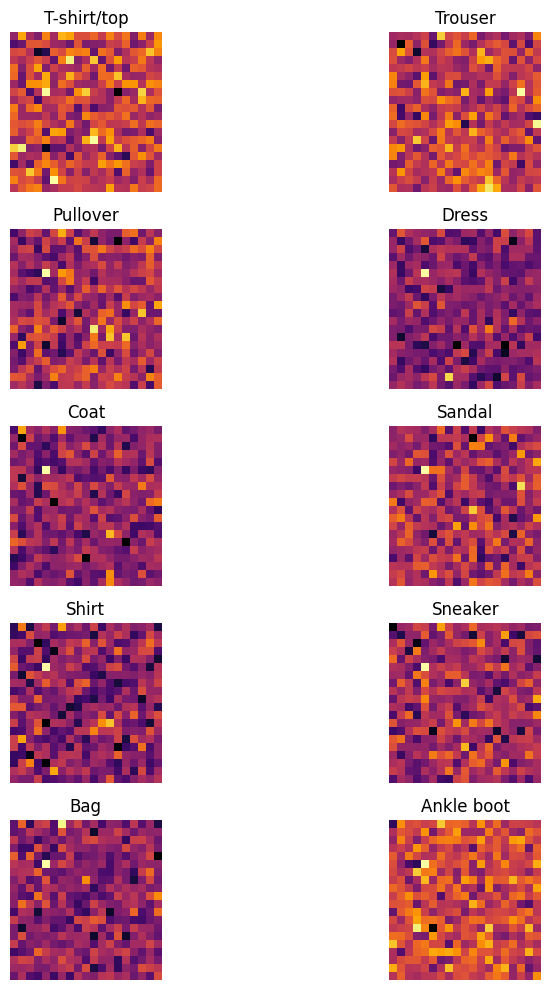

In [61]:
# # 5x2 grid with 10 images
# embedding_per_class_plot = get_embeddings(model_BERT, all_labels, clip=True)
# fig, ax = plt.subplots(5, 2, figsize=(10, 10))
# plt.set_cmap('inferno')

# for i, label in enumerate(all_labels):

#     R = embedding_per_class_plot[label].reshape(20, 19)
    
#     ax[i//2, i%2].imshow(R)
#     ax[i//2, i%2].set_title(label)
#     ax[i//2, i%2].axis('off')

# plt.tight_layout()
# plt.show()

In [66]:
# embedding_per_class = get_embeddings(model_BERT, all_labels, clip=False)
# embedding_per_class['Ankle boot'].shape

(384,)

### Create the model

In [6]:
mod1_image   = Network([784, 400, 100, 10])
mod1_image_v2   = Network([784, 400, 100, 10])
# mod2_txt_emb = Network([384, 400, 100, 10])


joint_architecture = [10, 10]  # Combining input sizes of mod1_image and mod2_txt_emb



model = MultimodalNetwork(mod1_image.architecture, mod1_image_v2.architecture, joint=joint_architecture, 
                          n_iter_inference=40, inf_rate = 0.01, learn_rate = 0.005, activation = "linear")

model   

In [11]:
# from tqdm import tqdm  # Import tqdm

# # Assuming you have datasets for both modalities: data_image and data_text_emb
# num_epochs = 2  # Example number of training epochs

# model.reset_rates()  # Reset the rates (activations, learning rates, etc.) for the networks

# subset = data_image = trainset.data[0:200,:,:]
# print(subset.shape)
# print("Trainig on subset data")

# MSE = []
# avg_MSE = 0
# # Train the multimodal network by iterating through the epochs
# for epoch in range(num_epochs):
    
#     t = tqdm(total=len(subset), desc=f'Epoch {epoch + 1}/{num_epochs}: MSE {avg_MSE}', unit='samples')
    
#     # Use tqdm to create a progress bar for the epochs
#     with t as pbar:
        
#         for idx, (image_data) in enumerate(subset):

#             label_indx = trainset.targets[idx]
#             label = trainset.classes[label_indx]

#             text_data = embedding_per_class[label]

#             # # Perform inference and learning steps for each pair of modalities
#             model.train(image_data, text_data, epochs=1)

#             # log MSE
#             # TODO
#             MSE.append(model.calculate_MSE())
            
#             t.desc = f'Epoch {epoch + 1}/{num_epochs}: MSE {idx}'
#             # Update the progress bar
#             pbar.update(1)


In [74]:
# embedding_per_class['Ankle boot'].shape
# import torch

# TEXT_data = []


# for idx, (image_data) in enumerate(subset):
    
#         label_indx = trainset.targets[idx]
#         label = trainset.classes[label_indx]
    
#         text_data = embedding_per_class[label]
#         TEXT_data.append(text_data)

# # to array TEXT_data, to torch tensor
# TEXT_data = np.array(TEXT_data)
# TEXT_data = torch.from_numpy(TEXT_data)

# print(subset.shape)
# print(TEXT_data.shape)

torch.Size([50, 784])
torch.Size([50, 384])


In [7]:
subset = trainset.data.reshape(trainset.data.shape[0], -1)[0:50,:]
print(subset.shape)
plt.imshow(subset[0].reshape(28,28))

torch.Size([50, 784])

torch.Size([50, 784])


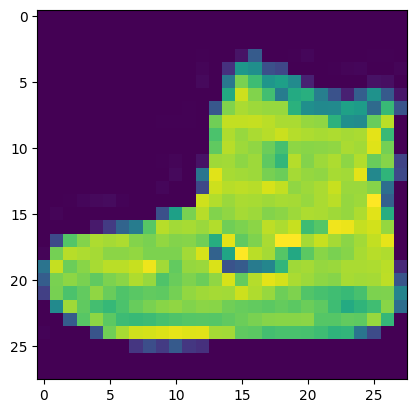

In [8]:
# tensor to numpy 
# subset[0].numpy().shape

model.train(subset, subset, epochs=2)

In [67]:

def plot_MSE(MSE):

    datapoints = MSE

    for point in datapoints: 
        
        mod1, mod2, joint = point

        for layer_error in mod1:
            pass
    return None

# plot_MSE(MSE)   

In [117]:
model.mod2.architecture

[784, 400, 100, 10]

In [17]:
def add_noise(image,mean_n=0, std_n=0.1):
    noise = np.random.normal(mean_n, std_n, image.shape)
    noisy_image = np.clip(image + noise, 0, 1)
    return noisy_image

In [1]:

## TO CHANGE ##
img = trainset.data[-2, :, :]

plt.imshow(img.reshape(28, 28))
plt.show()

# Infer through the image in modality 0 (mod1_image)
model.infer_unimodal(modality=0, image=img, initialize=False)

# Reconstruct at layer 0 for modality 1 (mod1_image_v2)
recon1, _ = model.reconstruct(modal="uni", layer=0)
plt.imshow(recon1.reshape(28, 28))
plt.show()

# Reconstruct at layer 0 for modality 2 (joint)
_, recon2 = model.reconstruct(modal="uni", layer=0)
plt.imshow(recon2.reshape(28, 28))
plt.show()

print("-----")

# # Reconstruct at layer 1 for modality 2 (joint)
# _, recon2_layer1 = model.reconstruct(modal="uni", layer=1)
# plt.imshow(recon2_layer1.reshape(28, 28))
# plt.show()

NameError: name 'trainset' is not defined

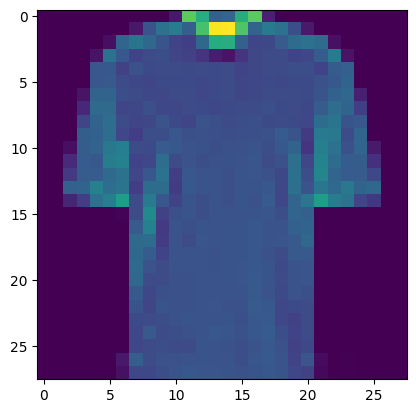

(784,) (784,)


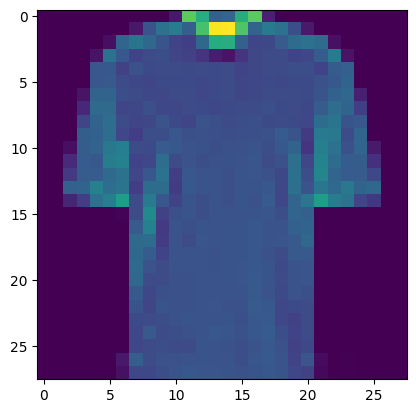

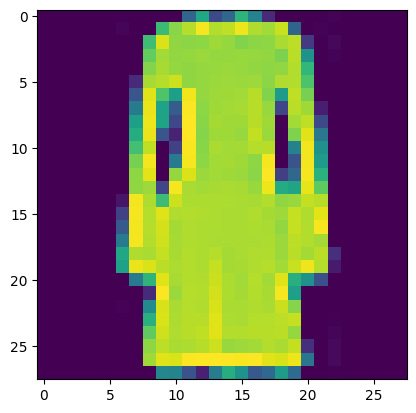

-----
(784,) (784,)


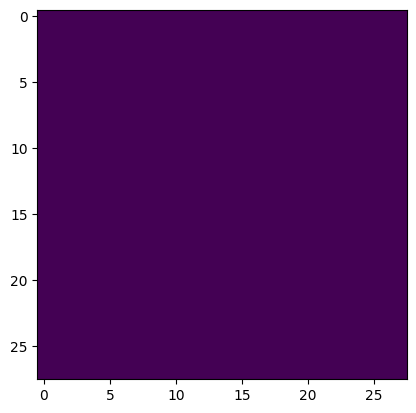

In [15]:
#  def reconstruct(self,modal, layer):
#         if modal == "uni":
#             recon1 = self.mod1.reconstruct(layer)
#             recon2 = self.mod2.reconstruct(layer)
#         if modal=="joint":
#             recon = self.joint.reconstruct(layer)
#             rec1 = self.mod1.layers[-1].weights.dot(recon)
#             rec2 = self.mod2.layers[-1].weights.dot(recon)
#             recon1 = self.mod1.reconstruct(layer= self.mod1.n_layers-1,recon = rec1)
#             recon2 = self.mod2.reconstruct(layer= self.mod2.n_layers-1,recon = rec2)
#         return recon1, recon2
    
    # def infer_unimodal(self,modality,image, initialize = True):
    #     '''
    #     presents the image to the specified modality,
    #     performs inference on one modality and the joint network
    #     '''
    #     if modality ==0:
    #         net = self.mod1
    #     else:
    #         net = self.mod2
            
    #     if initialize:
    #         self.reset_rates()
    #     net.layers[0].r = np.array(image).reshape([-1])
    #     for i in range(self.n_iter_inference):
    #         net.inference_step(r_M = self.joint.layers[0].r)
    #         #topmost layer gets no prediction and send no BU_error
    #         BU = net.layers[-1].weights.T.dot(net.layers[-1].e)
    #         self.joint.inference_step(BU_error= [BU])

# Reconstruct from multi model 

# img = trainset.data[-1,:,:]
# plt.imshow(img.reshape(28, 28))
# plt.show()

img = trainset.data[-2,:,:]
plt.imshow(img.reshape(28, 28))
plt.show()
model.infer_unimodal(modality=0, image=img, initialize=False)

recon1, recon2 = model.reconstruct(modal="uni", layer=0)
print(recon1.shape, recon2.shape)
plt.imshow(recon1.reshape(28, 28))
plt.show()

plt.imshow(recon2.reshape(28, 28))
plt.show()

print("-----")
recon1, recon2 = model.reconstruct(modal="uni", layer=1)
print(recon1.shape, recon2.shape)
plt.imshow(recon2.reshape(28, 28))
plt.show()

# TODO ??????

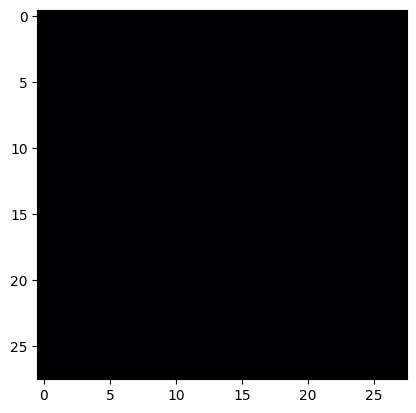

In [110]:

# model.reset_rates()

# combi_tshirt = embedding_per_class_plot['Sandal'] + embedding_per_class_plot['Shirt']

# model.infer_unimodal(modality=1, image=combi_tshirt, initialize=False)

# recon1, recon2 = model.reconstruct(modal="uni", layer=0)
# plt.imshow(recon1.reshape(28, 28))
# plt.show()



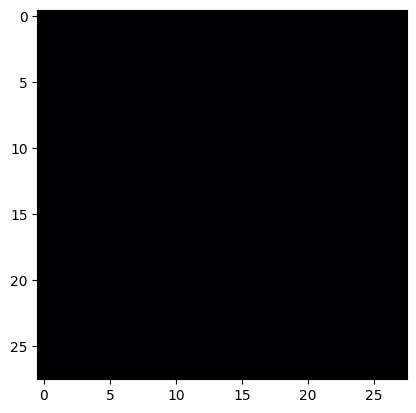

In [99]:
recon = model.mod1.layers[0].weights.dot(model.mod1.layers[1].weights.dot(model.mod1.layers[2].r))
# layers[0].weights.dot(model.layers[1].weights.dot(model.layers[2].r))
# recon_layers = M1.layers[0].weights.dot(M1.layers[1].weights.dot(M1.layers[2].r))
img2 = recon.reshape(28, 28)

plt.imshow(img2)

In [27]:
# model.infer_unimodal(1, text_emb, initialize=False)


In [ ]:
# model.save('saved_models', 'multimodal_model')
